## Playing with QuantStats lib


In [1]:
from enum import Enum, auto

import quantstats as qs

In [2]:
qs.extend_pandas()

/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


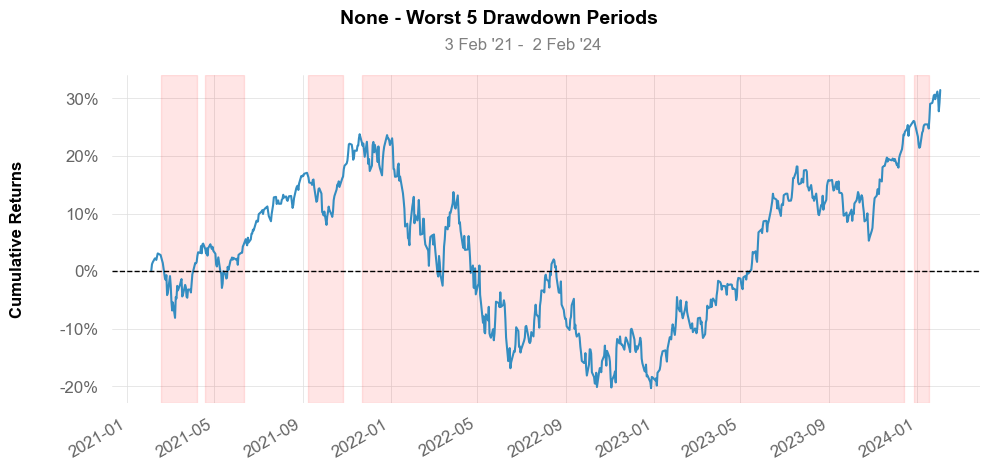

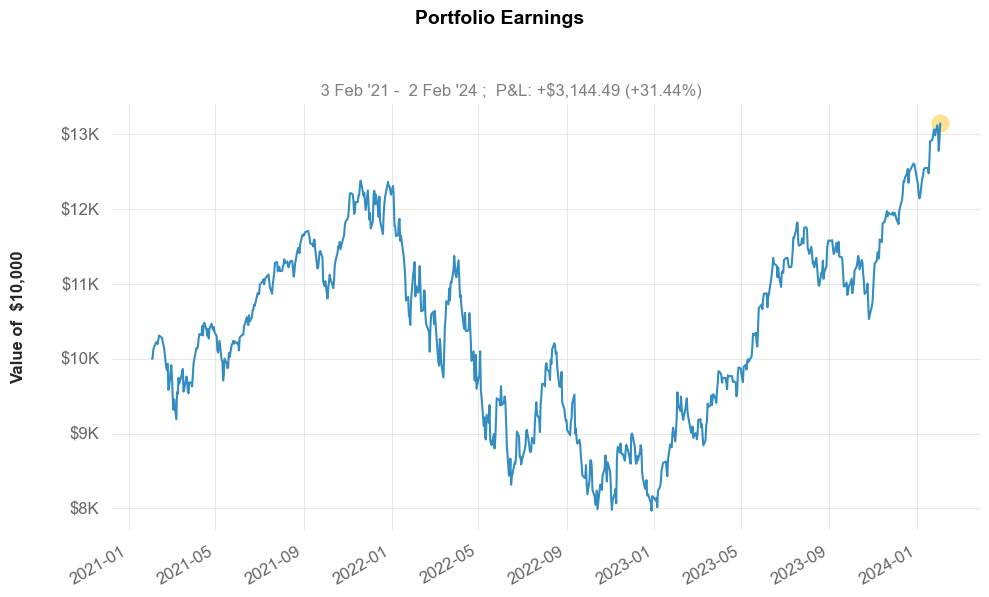

In [3]:
stock = qs.utils.download_returns("QQQ", period="3y")
qs.plots.drawdowns_periods(stock)
stock.plot_earnings(savefig="output/qqq_earning.png", start_balance=10_000)

In [6]:
for ticker in ("QQQ", "TQQQ"):
    stock = qs.utils.download_returns(ticker, period="10y")
    qs.reports.html(
        stock, "SPY", title=f"{ticker} vs SPY", output=f"output/{ticker}_vs_spy.html"
    )

/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The

To check technicals on QuantStats webpage:

open portfolio_experiment/quant_stats/output/qqq_vs_spy.html


## Building my fund


In [2]:
import quantstats as qs

qs.extend_pandas()

tickers = {"AMZN": 0.5, "META": 0.5}

portfolio = qs.utils.make_index(ticker_weights=tickers)

/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/quantstats/utils.py:379: FutureWarning: 'M' is d

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
stock = qs.utils.download_returns("AAPL", period="10y")
stock = stock.iloc[1:]
sma = stock.rolling(50).mean()
strategy = qs.utils.make_index((stock > sma) * stock, period="5y")
qs.plots.returns(strategy, benchmark=stock)

In [15]:
portDict = {"AAPL": 0.5, "AMZN": 0.5}

benchmarkDict = {
    "SPY": 0.8000150841498997,
    "TLT": 0.022630540561564712,
    "USCI": 0.16886517499360199,
    "VNQ": 0.00848920029493363,
}

qs.extend_pandas()

p1 = qs.utils.make_index(portDict)
# b1 = qs.utils.make_index(benchmarkDict)

# qs.reports.html(p1, b1, output='Rif_vs_bench.html')

/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                AAPL      AMZN       break
Date                                      
1997-05-16 -0.014084 -0.058514         NaN
1997-05-19 -0.014492 -0.012040         NaN
1997-05-20  0.014705 -0.042685         NaN
1997-05-21 -0.021738 -0.127392         NaN
1997-05-22 -0.014814 -0.021891         NaN
...              ...       ...         ...
2022-12-31       NaN       NaN  1672441200
2023-04-30       NaN       NaN  1682805600
2023-09-30       NaN       NaN  1696024800
2023-12-31       NaN       NaN  1703977200
2024-01-31       NaN       NaN  1706655600

[6817 rows x 3 columns]



/Users/tdafonseca/Library/Caches/pypoetry/virtualenvs/portfolio-optimization-2Fq1uBJ6-py3.9/lib/python3.9/site-packages/quantstats/utils.py:379: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rbdf = index.resample(rebalance).first()


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [37]:
for ticker in portDict.keys():
    print(ticker)

AAPL
AMZN
